# SuperPoderosas

Índice:

1. Gestión de datos vacíos e imputación
2. Normalizar variables numéricas
3. Primera prueba
4. Numeración de las variables categóricas
5. Transformación de la etiqueta
6. Partición de datos de entrenamiento
7. Estudio de valores anómalos
8. Estudio y extracción de características
9. Segunda prueba

aaaaaaaaa

10. Estudio de la cantidad de de variables relevantes e hiperparámetros
11. (Posible lasso?) 
11. Tercera prueba
12. Modelo final

aaaaaaaaaaaaaaaaaa

8. Uso de los datos de test y pasarlo a kaggle
8. Reversión de modificaciones
9. Conclusiones del estudio

## 1. Gestión de datos vacíos e imputaciones

Carga de datos:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [83]:
train_dataset = pd.read_csv('train.csv', header='infer')
test_dataset = pd.read_csv('test.csv', header='infer')

train_dataset.columns
#test_dataset



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 1.1 Gestión de datos vacíos

In [84]:
#  Busca valores nulos en training.
train_data_null_values = train_dataset.isnull().sum(axis=0)

train_null_val = train_data_null_values[train_data_null_values > 0 ]
#print(train_null_val)

#print("-------------")
#  Busca valores nulos en training.
test_data_null_values = test_dataset.isnull().sum(axis=0)

test_null_val = test_data_null_values[test_data_null_values > 0 ]
#print(test_null_val)

total_null_dataset = train_null_val.fillna(0).add(test_null_val.fillna(0), fill_value=0)
total_null_dataset

# 

Alley           2721.0
BsmtCond          82.0
BsmtExposure      82.0
BsmtFinSF1         1.0
BsmtFinSF2         1.0
BsmtFinType1      79.0
BsmtFinType2      80.0
BsmtFullBath       2.0
BsmtHalfBath       2.0
BsmtQual          81.0
BsmtUnfSF          1.0
Electrical         1.0
Exterior1st        1.0
Exterior2nd        1.0
Fence           2348.0
FireplaceQu     1420.0
Functional         2.0
GarageArea         1.0
GarageCars         1.0
GarageCond       159.0
GarageFinish     159.0
GarageQual       159.0
GarageType       157.0
GarageYrBlt      159.0
KitchenQual        1.0
LotFrontage      486.0
MSZoning           4.0
MasVnrArea        23.0
MasVnrType      1766.0
MiscFeature     2814.0
PoolQC          2909.0
SaleType           1.0
TotalBsmtSF        1.0
Utilities          2.0
dtype: float64

##### Visualización de valores faltantes

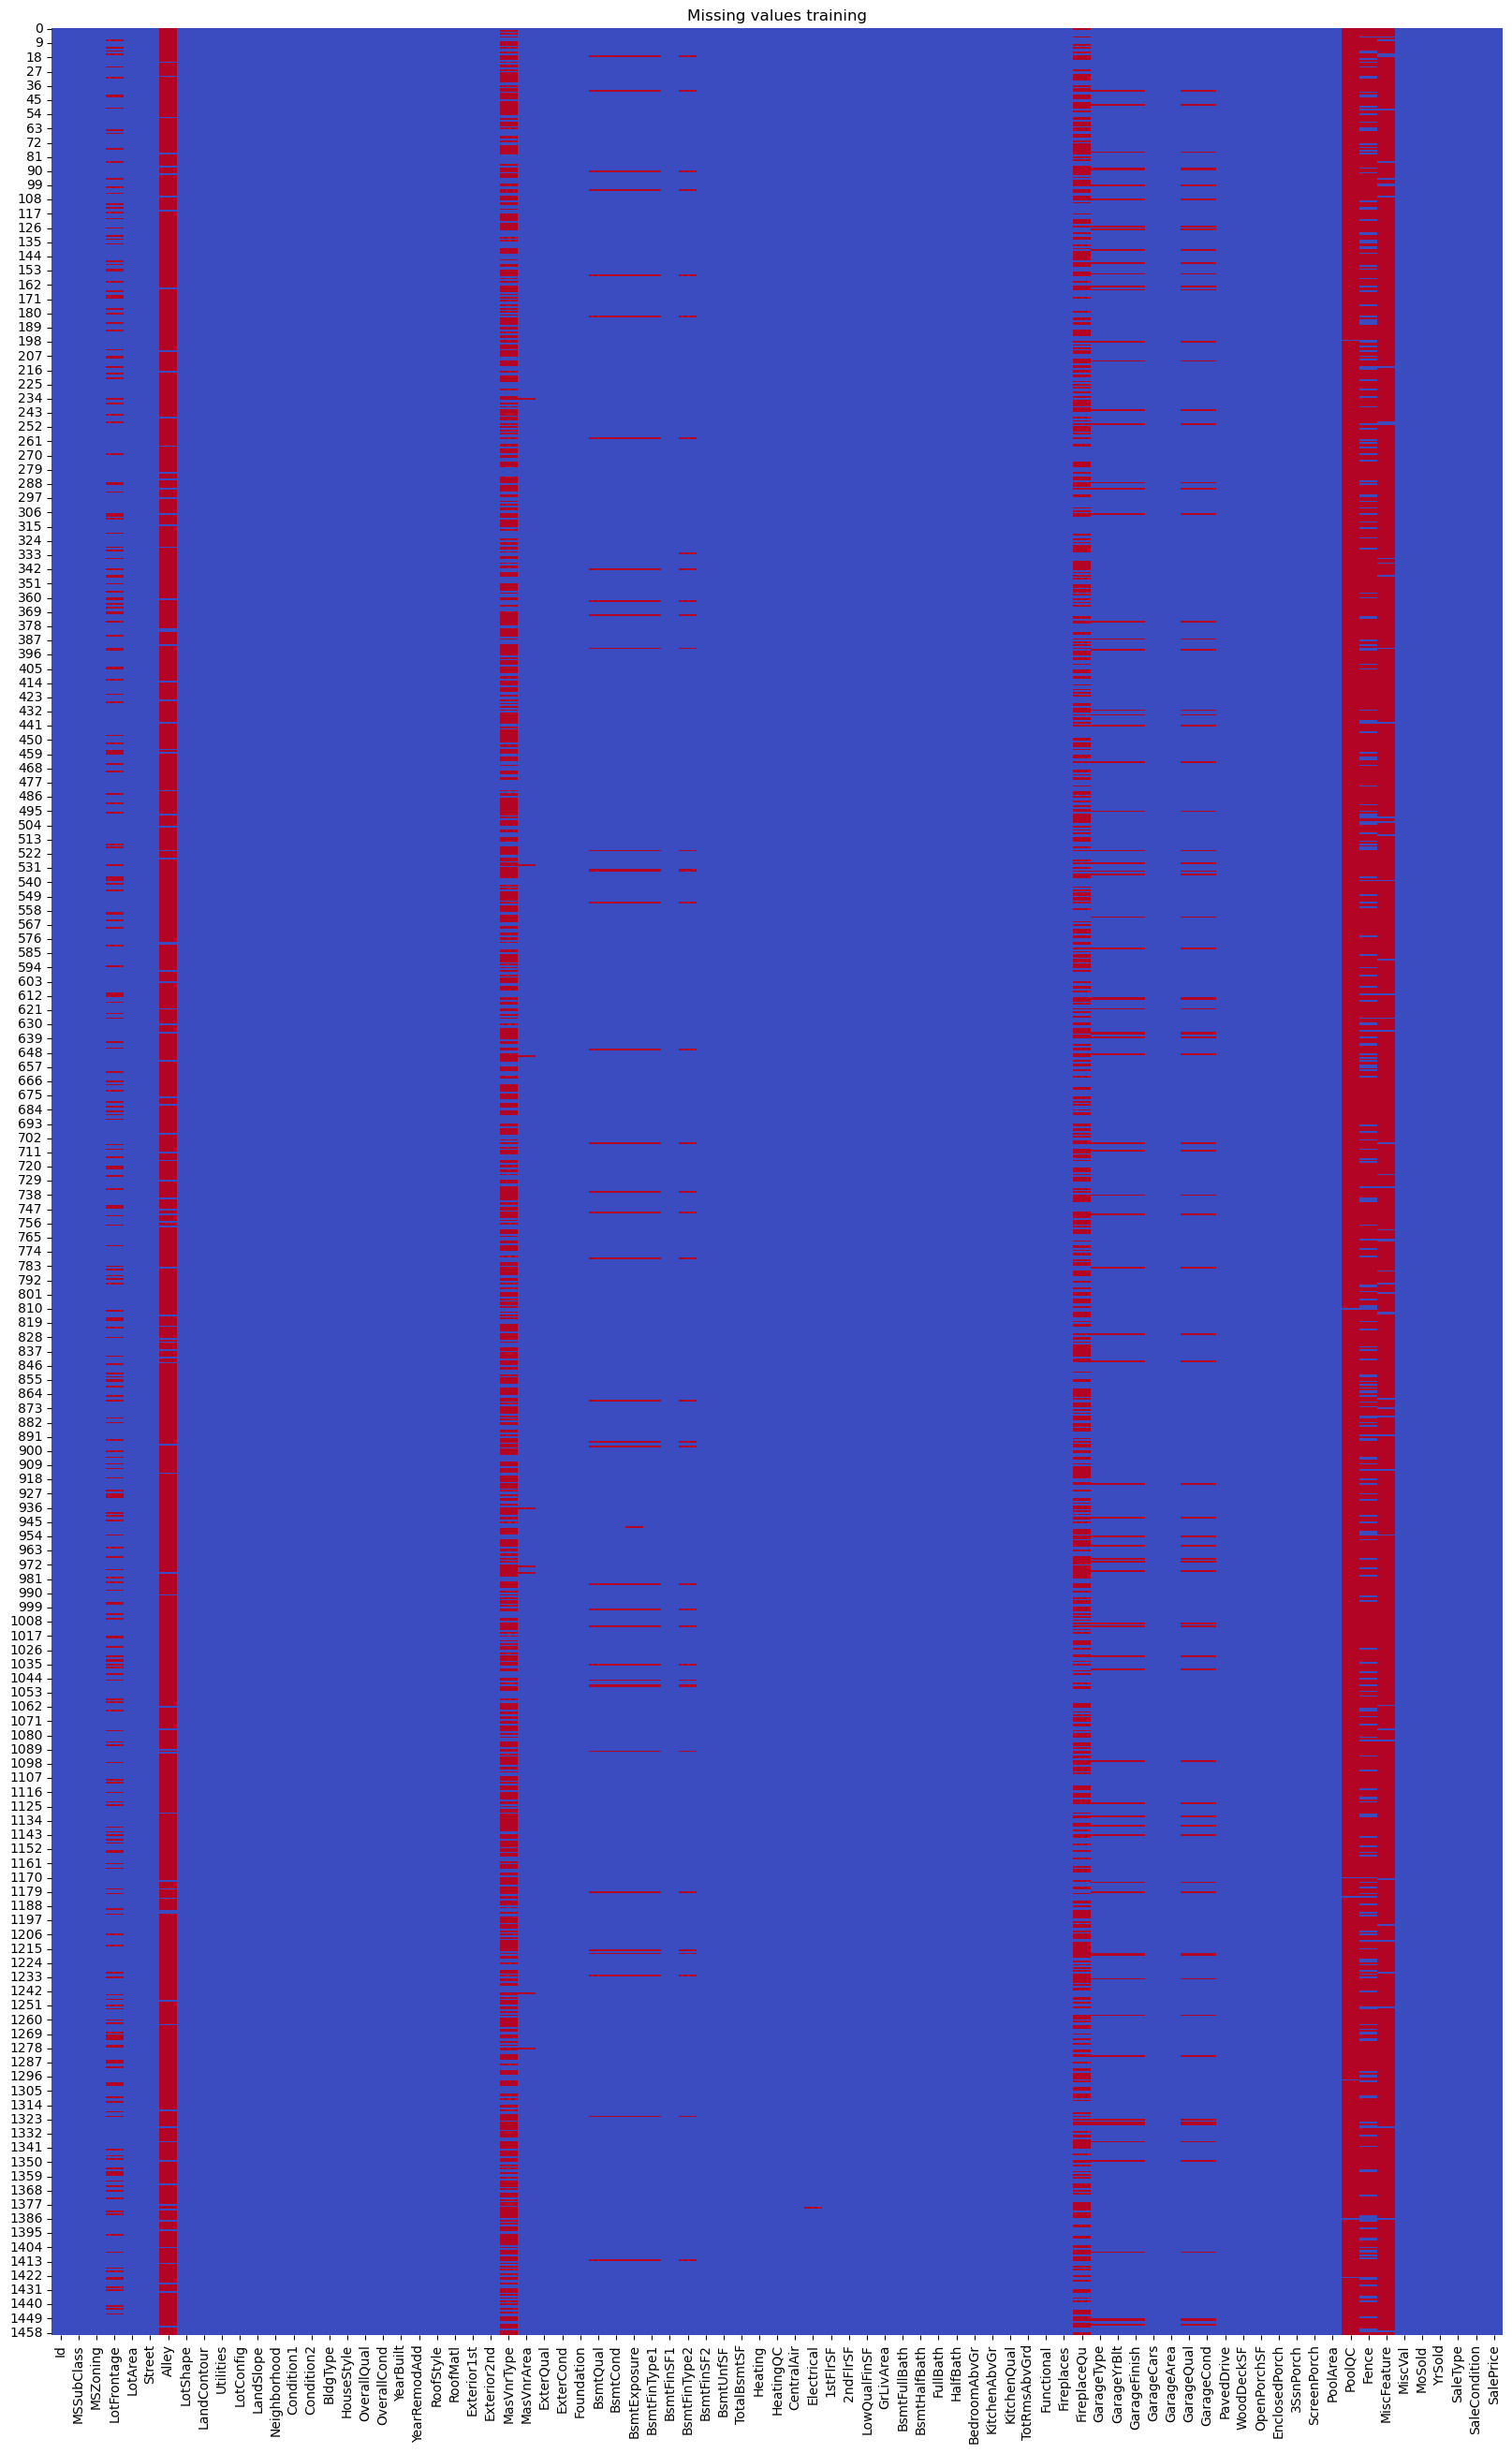

In [85]:
matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

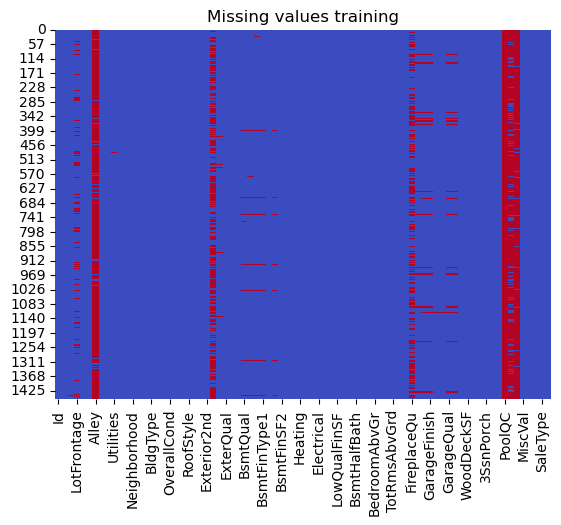

In [86]:
matriz_test_null = test_dataset.isnull()
sns.heatmap(matriz_test_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

Se procede a realizar un estudio de las siguientes variables para determinar qué realizar con los valores faltantes. Para ello se procederá a eliminar todas las filas con una tasa de NaN inferior al 1% (es decir, menos de 29 valores nulos)

https://www.kaggle.com/code/asyaaatru/sale-price-as-detailed-as-possible

Las columnas con 29 o menos NaN son las siguientes. Se procederá a la eliminación completa de la fila correspondiente al valor faltante: 
- BsmtFinSF1         1.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtFinSF2         1.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtFullBath       2.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtHalfBath       2.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtUnfSF          1.0 - Filas eliminadas (Cantidad menor al umbral)
- Electrical         1.0 - Filas eliminadas (Cantidad menor al umbral)
- Exterior1st        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Exterior2nd        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Functional         2.0 - Filas eliminadas (Cantidad menor al umbral)
- GarageArea         1.0 - Filas eliminadas (Cantidad menor al umbral)
- GarageCars         1.0 - Filas eliminadas (Cantidad menor al umbral)
- KitchenQual        1.0 - Filas eliminadas (Cantidad menor al umbral)
- MSZoning           4.0 - Filas eliminadas (Cantidad menor al umbral)
- MasVnrArea        23.0 - Filas eliminadas (Cantidad menor al umbral)
- SaleType           1.0 - Filas eliminadas (Cantidad menor al umbral)
- TotalBsmtSF        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Utilities          2.0 - Filas eliminadas (Cantidad menor al umbral)

Una vez filtrados, estudiaremos los datos con NaN restantes uno a uno, decidiendo si eliminar o imputar:

- Alley           2721.0 - Considerado como "Cantidad = 0"
- BsmtCond          82.0 - Considerado como "Cantidad = 0"
- BsmtExposure      82.0 - Considerado como "Cantidad = 0"
- BsmtFinType1      79.0 - Considerado como "Cantidad = 0"
- BsmtFinType2      80.0 - Considerado como "Cantidad = 0"
- BsmtQual          81.0 - Considerado como "Cantidad = 0"
- Fence           2348.0 - Considerado como "Cantidad = 0"
- FireplaceQu     1420.0 - Considerado como "Cantidad = 0"
- GarageCond       159.0 - Considerado como "Cantidad = 0"
- GarageFinish     159.0 - Considerado como "Cantidad = 0"
- GarageQual       159.0 - Considerado como "Cantidad = 0"
- GarageType       157.0 - Considerado como "Cantidad = 0"
- GarageYrBlt      159.0 - Considerado como "Cantidad = 0" --> en test hay dos que no tienen sentido
- LotFrontage      486.0 - Valor faltante
- MasVnrType      1766.0 - Considerado como "Cantidad = 0"
- MiscFeature     2814.0 - Considerado como "Cantidad = 0"
- PoolQC          2909.0 - Considerado como "Cantidad = 0"

De las variables con NaN, solo en "LotFrontage" y "MasVnrType" se han considerado que los NaN hacen referencia a datos vacíos. Se procederán a descartar las columnas por las siguientes razones:
 - En "LotFrontage" hay un 16.7% de datos faltantes, por lo que se procedió a analizar su relevancia. Tras un riguroso análisis se consideró poco relevante y se eliminó del modelo final(Fuete: la de los deseos)

#### 1.2 Tratamiento de missing values

- Vamos a cambiar los NaN que hacen referencia a una clase en una variable categórica o a un valor en una numérica.
- Los NaN que son realmente valores faltantes, como son una proporción muy pequeña, vamos a eliminar las filas donde se encuentran (o imputar sus valores).

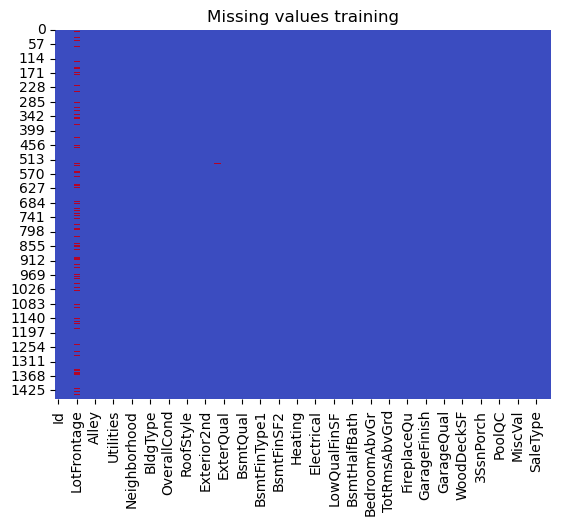

In [87]:
caract_clase_NA = ['Alley','MasVnrType','BsmtQual','GarageYrBlt','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# Cambiamos el valor nan por una clase 'No hay'
for caract in caract_clase_NA:
    train_dataset[caract] = train_dataset[caract].fillna('0')
    test_dataset[caract] = test_dataset[caract].fillna('0')


matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()


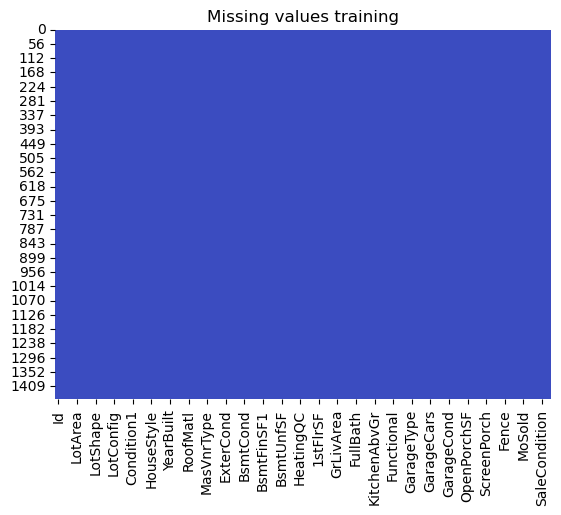

Series([], dtype: int64)

In [88]:
# Variables con "True NaN"
caract_nan = ['LotFrontage','MasVnrArea','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']

# Borramos las filas que contienen valores NaN no equivalentes a 0
umbral = 0.01*(train_dataset.shape[0]+test_dataset.shape[0]) # si es el 1% del total de datos se borra la fila

for caract1 in caract_nan:
    if 0<train_data_null_values[caract1] <= umbral:
        train_dataset = train_dataset.dropna(subset=[caract1])
    if 0<test_data_null_values[caract1] <= umbral:
        test_dataset = test_dataset.dropna(subset=[caract1]) # borrar fila si la columna caract1 tiene NaN

# FALTA ELIMINAR COLUMNAS Y/O IMPUTAR      


for df in [train_dataset, test_dataset]:
    if "LotFrontage" in df.columns:
        df.drop(columns=["LotFrontage"], inplace=True)

matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

train_dataset.isnull().sum(axis=0)[train_dataset.isnull().sum(axis=0) > 0]

## 2. Normalización de datos numéricos

Obtención de datos numéricos

In [89]:
numerical_values=train_dataset[[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]]
#"BsmtFinSF1"
#"BsmtFinSF2"
#"BsmtUnfSF"
# Lista de características de propiedades con comentarios explicativos

numerical_values_test=test_dataset[[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]]

Normalización

In [90]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

# Lo dice Samnsung
X_train_robust = rbs.fit_transform(numerical_values)
X_test_robust = rbs.fit_transform(numerical_values_test)

X_test_robust

array([[-6.00000000e-01,  5.47768374e-01, -5.00000000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.00000000e-01,  1.19198685e+00,  0.00000000e+00, ...,
         1.25000000e+04,  0.00000000e+00,  1.00000000e+00],
       [ 2.00000000e-01,  1.08555075e+00, -5.00000000e-01, ...,
         0.00000000e+00, -7.50000000e-01,  1.00000000e+00],
       ...,
       [-6.00000000e-01,  2.58832126e+00, -5.00000000e-01, ...,
         0.00000000e+00,  7.50000000e-01, -1.00000000e+00],
       [ 7.00000000e-01,  2.60122998e-01, -5.00000000e-01, ...,
         7.00000000e+02,  2.50000000e-01, -1.00000000e+00],
       [ 2.00000000e-01,  6.18644584e-02,  5.00000000e-01, ...,
         0.00000000e+00,  1.25000000e+00, -1.00000000e+00]])

## 3 Primera versión
Se procederá a realizar un modelo usando como datos las variables numéricos para ver el comportamiento inicial del modelo. Los modelos a entrenar son los siguientes:
- Regresión lineal 
- Random forest


In [ ]:
# Regresion lineal con variables numéricas:

lr = LinearRegression()

lr.fit(X_train_robust, train_dataset[["SalePrice"]])
predY = lr.predict(X_train_robust)

print(predY.size)

a= metrics.mean_squared_error(train_dataset[["SalePrice"]], predY)
print(np.sqrt(a))


# Mostrar features ordenadas

features = [
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

coef_dict = dict(zip(features, lr.coef_.ravel()))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
sorted_keys



1451
34083.44853690971


['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'KitchenAbvGr',
 'GarageCars',
 'BsmtFullBath',
 '2ndFlrSF',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'MSSubClass',
 '1stFlrSF',
 'TotalBsmtSF',
 'OverallCond',
 'MasVnrArea',
 'Fireplaces',
 'BsmtHalfBath',
 'WoodDeckSF',
 'YearRemodAdd',
 'FullBath',
 'HalfBath',
 'GarageArea',
 'LotArea',
 'YrSold',
 'OpenPorchSF',
 'GarageYrBlt',
 'MoSold',
 'ScreenPorch',
 'PoolArea',
 '3SsnPorch',
 'LowQualFinSF',
 'EnclosedPorch',
 'MiscVal']

In [92]:
# Random forest con variables numéricas:

RFR = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFR.fit(X_train_robust, train_dataset[["SalePrice"]])
predY = RFR.predict(X_train_robust)


a= metrics.mean_squared_error(train_dataset[["SalePrice"]], predY)
print(np.sqrt(a))


# Mostrar features ordenadas
features = [
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

coef_dict = dict(zip(features, RFR.feature_importances_))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
sorted_keys


c:\Users\josec\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


25544.889385338698


['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GarageCars',
 '1stFlrSF',
 'GarageArea',
 'LotArea',
 'TotRmsAbvGrd',
 'FullBath',
 'YearBuilt',
 'GarageYrBlt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'WoodDeckSF',
 'BsmtFullBath',
 'OpenPorchSF',
 'KitchenAbvGr',
 'OverallCond',
 'BedroomAbvGr',
 'MoSold',
 'MSSubClass',
 'HalfBath',
 'ScreenPorch',
 'YrSold',
 '3SsnPorch',
 'EnclosedPorch',
 'LowQualFinSF',
 'BsmtHalfBath',
 'PoolArea',
 'MiscVal']

## 4. Numeración de las característas categóricas


#### 4.1 Aplicación de OneHotEncoding

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# MSSubClass es NUMERICA
caract_categoricas_nominales = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition']
categoricasdf_train = pd.DataFrame()
categoricasdf_test = pd.DataFrame()
for carac in caract_categoricas_nominales:
    print(carac)
    print(train_dataset[[carac]])
    train_target = pd.DataFrame(train_dataset[carac], columns = [carac])
    train_target.head(20)
    test_target = pd.DataFrame(test_dataset[carac], columns = [carac])

    one_hot_encoder =OneHotEncoder(sparse_output=False)
    #ohe_reshaper = one_hot_encoder.fit_transform(train_target)
    one_hot_encoder.fit(train_target)
    ohe_array_train = one_hot_encoder.transform(train_target)
    ohe_array_test = one_hot_encoder.transform(test_target)
    feature_names = one_hot_encoder.get_feature_names_out(train_target.columns)
    print('_____')
    print(feature_names)
    print(ohe_array_train)
    ohe_df = pd.DataFrame(ohe_array_train, columns= feature_names)
    categoricasdf_train = pd.concat([categoricasdf_train,ohe_df],axis=1,join='outer')

    ohe_df_test = pd.DataFrame(ohe_array_test, columns= feature_names)
    categoricasdf_test = pd.concat([categoricasdf_test,ohe_df_test],axis=1,join='outer')


#print(feature_names)  
#categoricasdf.head(20)
categoricasdf_train.shape

MSZoning
     MSZoning
0          RL
1          RL
2          RL
3          RL
4          RL
...       ...
1455       RL
1456       RL
1457       RL
1458       RL
1459       RL

[1451 rows x 1 columns]
_____
['MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM']
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
Street
     Street
0      Pave
1      Pave
2      Pave
3      Pave
4      Pave
...     ...
1455   Pave
1456   Pave
1457   Pave
1458   Pave
1459   Pave

[1451 rows x 1 columns]
_____
['Street_Grvl' 'Street_Pave']
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Alley
     Alley
0        0
1        0
2        0
3        0
4        0
...    ...
1455     0
1456     0
1457     0
1458     0
1459     0

[1451 rows x 1 columns]
_____
['Alley_0' 'Alley_Grvl' 'Alley_Pave']
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
LandContour
     LandContour
0            L

(1451, 164)

Unimos los dataframes de variables numericas normalizadas con el de las variables categoricas nominales con oneHotEncoding

In [94]:
X_train_robust_df = pd.DataFrame(X_train_robust, columns=features)
#X_train_robust_df
df_joined_train = pd.concat([categoricasdf_train,X_train_robust_df],axis=1,join='outer') 
df_joined_train.shape

X_test_robust_df = pd.DataFrame(X_test_robust, columns=features)
#X_test_robust_df
df_joined_test = pd.concat([categoricasdf_test,X_test_robust_df],axis=1,join='outer') 
df_joined_test.shape

(1432, 196)

#### 4.2 Numerización de las variables categóricas ordinales:

In [95]:
caract_categoricas_ordinales = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

# Definición del diccionario con las transformaciones
diccionario_ordinales = {'LotShape_dic' : {'Reg':1,'IR1':2,'IR2':3,'IR3':4}, 
                        'Utilities_dic' : {'ELO':1,'NoSeWa':2,'NoSeWr':3,'AllPub':4},
                        'LandSlope_dic' : {'Gtl':1,'Mod':2,'Sev':3},
                        'ExterQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'ExterCond_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'BsmtQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0}, # no sé si hay que poner un 0 o empezar siempre en el 1
                        'BsmtCond_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'BsmtExposure_dic' : {'Gd':4,'Av':3,'Mn':2,'No':1,'0':0},
                        'BsmtFinType1_dic' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0},
                        'BsmtFinType2_dic' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0},
                        'HeatingQC_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'Electrical_dic' : {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},
                        'KitchenQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'Functional_dic' : {'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8},
                        'FireplaceQu_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'GarageFinish_dic' : {'Fin':3,'RFn':2,'Unf':1,'0':0},
                        'GarageQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'GarageCond_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'PavedDrive_dic' : {'Y':3,'P':2,'N':1},
                        'PoolQC_dic' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'0':0},
                        'Fence_dic' : {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'0':0}}

df_vars_ord_limp_train = pd.DataFrame()
df_vars_ord_limp_test= pd.DataFrame()

# Transformaciones
for caract in caract_categoricas_ordinales:
    df_vars_ord_limp_train[caract] = train_dataset[caract].map(diccionario_ordinales[caract+'_dic'])
    df_vars_ord_limp_test[caract] = test_dataset[caract].map(diccionario_ordinales[caract+'_dic'])

df_vars_ord_limp_train

,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,1,4,1,4,3,4,3,1,6,1,...,5,4,1,0,2,3,3,3,0,0
1,1,4,1,3,3,4,3,4,5,1,...,5,3,1,3,2,3,3,3,0,0
2,2,4,1,4,3,4,3,2,6,1,...,5,4,1,3,2,3,3,3,0,0
3,2,4,1,3,3,3,4,1,5,1,...,5,4,1,4,1,3,3,3,0,0
4,2,4,1,4,3,4,3,3,6,1,...,5,4,1,3,2,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,4,1,3,3,4,3,1,1,1,...,5,3,1,3,2,3,3,3,0,0
1456,1,4,1,3,3,4,3,1,5,3,...,5,3,2,3,1,3,3,3,0,3
1457,1,4,1,5,4,3,4,1,6,1,...,5,4,1,4,2,3,3,3,0,4
1458,1,4,1,3,3,3,3,2,6,3,...,4,4,1,0,1,3,3,3,0,0


In [96]:
#Comprobar que se ha realizado correctamente la transformación previa
test_dataset.isnull().sum(axis=0)[test_dataset.isnull().sum(axis=0) > 0]

Series([], dtype: int64)

Se procede a unir el dataset con la numerización de las variables con el que tiene todos los cambios previos:

In [97]:
print("Train pre concat: ", df_joined_train.shape)

#OJO: Estamos reseteando los indices debido a diferencias con lso indices tras eliinar filas
df_joined_train = pd.concat([df_joined_train.reset_index(drop=True),
                             df_vars_ord_limp_train.reset_index(drop=True)]
                             ,axis=1,join='outer') 
print("Train post concat: ", df_joined_train.shape)

print("Test pre concat: ", df_joined_test.shape)
df_joined_test = pd.concat([df_joined_test.reset_index(drop=True),
                            df_vars_ord_limp_test.reset_index(drop=True)],
                            axis=1,join='outer') 
print("Test post concat: ", df_joined_test.shape)


Train pre concat:  (1451, 196)
Train post concat:  (1451, 217)
Test pre concat:  (1432, 196)
Test post concat:  (1432, 217)


## 5. Transformación de la etiqueta

Se procede a mostrar la variable "SalePrice" para ver su distribución

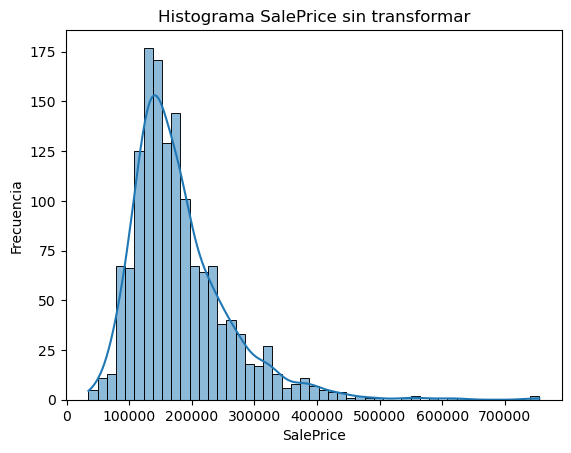

In [98]:
# Visualización del histograma de la etiqueta
plt.figure()
sns.histplot(train_dataset['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.title('Histograma SalePrice sin transformar')
plt.show()

Puesto que sigue una distribución asimétrica a la derecha, se procederá a aplicar una trasformación logarítmica para normalizar así los datos

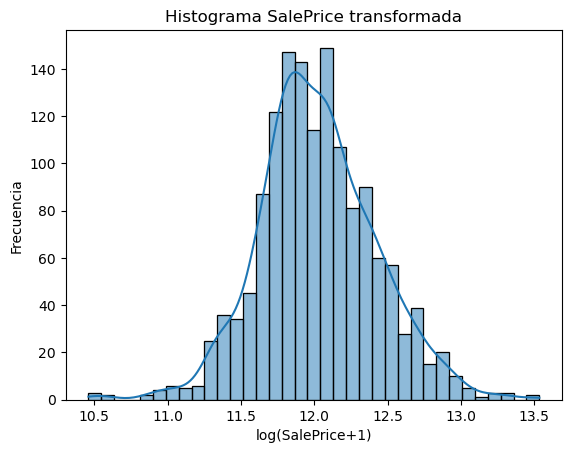

In [99]:
# Transformación logarítmica de la etiqueta

# Se le añade +1 al logaritmo para evitar que sea log(0)
log_prices = np.log1p(train_dataset['SalePrice'])

# Visualización del histograma de la etiqueta
plt.figure()
sns.histplot(log_prices, kde=True)
plt.xlabel('log(SalePrice+1)')
plt.ylabel('Frecuencia')
plt.title('Histograma SalePrice transformada')
plt.show()

## 6. Partición de datos de entrenamiento

Se procederá a separar los datos de entrenamiento en X_train y Y_train para ajustar hiperparámetros (por ejemplo, en regresiones o árboles), evaluar si tu modelo generaliza bien antes del test final, evitar sobreajuste (overfitting)

In [100]:
from sklearn.model_selection import train_test_split

# Separa log prices en bines
# Se ha sustituido digitize por qcut porque genera bins con similar número de observaciones, 
# facilitando la estratificación y evitando bins demasiado pequeños
y_binned = pd.qcut(log_prices, q=10, duplicates='drop') 

# Dividir estratificando por los bins
X_train, X_val, y_train, y_val = train_test_split(
    df_joined_train, log_prices, 
    test_size=0.2, # separamos los datos en 80% training y 20% validation 
    random_state=42, 
    stratify=y_binned  # estratifica según los intervalos
)

print(X_train.shape, X_val.shape)
X_train.head(10)


(1160, 217) (291, 217)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
1262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4,3,1,0,1,3,3,3,0,2
625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,3,1,4,2,3,3,3,0,0
37,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,3,1,3,3,3,3,3,0,0
1160,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,0,2,3,3,3,0,0
121,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,3,1,0,1,3,3,2,0,3
705,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,4,3,3,3,3,0,0
1304,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,5,2,4,4,3,0,0
92,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5,3,1,0,1,3,3,3,0,0
114,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,3,1,3,3,3,0,3
906,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,4,3,3,3,3,0,0


Además de separar los datos normalizados, se va a separar los datos sin normalizar después de haber tratado los valores NaN. Esto nos permitirá estudiar y visualizar las características de forma mas clara en el futuro

In [101]:
from sklearn.model_selection import train_test_split

# Separa log prices en bines
# Se ha sustituido digitize por qcut porque genera bins con similar número de observaciones, 
# facilitando la estratificación y evitando bins demasiado pequeños
y_binned_og = pd.qcut(train_dataset['SalePrice'], q=10, duplicates='drop') 

# quitamos la columna de PriceSale del train_dataset
X_train_og_sin_Y = train_dataset.drop(columns='SalePrice')

# Dividir estratificando por los bins
X_train_og, X_val_og, y_train_og, y_val_og = train_test_split(
    X_train_og_sin_Y, train_dataset['SalePrice'], 
    test_size=0.2, # separamos los datos en 80% training y 20% validation 
    random_state=42, 
    stratify=y_binned_og  # estratifica según los intervalos
)

print(X_train_og.shape, X_val_og.shape)


(1160, 79) (291, 79)


## 7. Estudio y extracción de características

#### 7.1 Extracción de características

Creación de nuevas caracteríticas a partir de la combinación lineal de las existentes

In [102]:
# Total metros cuadrados
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_val['TotalSF'] = X_val['TotalBsmtSF'] + X_val['1stFlrSF'] + X_val['2ndFlrSF']

# Total baños
X_train['TotalBath'] = X_train['FullBath'] + 0.5*X_train['HalfBath'] + X_train['BsmtFullBath'] + 0.5*X_train['BsmtHalfBath']
X_val['TotalBath'] = X_val['FullBath'] + 0.5*X_val['HalfBath'] + X_val['BsmtFullBath'] + 0.5*X_val['BsmtHalfBath']

# Años casa
X_train['HouseAge'] = X_train['YrSold'] - X_train['YearBuilt']
X_val['HouseAge'] = X_val['YrSold'] - X_val['YearBuilt']

# Año desde remodelación
X_train['YearSinceRemod'] = X_train['YrSold'] - X_train['YearRemodAdd']
X_val['YearSinceRemod'] = X_val['YrSold'] - X_val['YearRemodAdd']

# Condición de la casa por los m^2
X_train['OverallCond_TotalSF'] = X_train['OverallCond'] * X_train['TotalSF']
X_val['OverallCond_TotalSF'] = X_val['OverallCond'] * X_val['TotalSF']

# Calidad de la casa por los m^2
X_train['OverallQual_TotalSF'] = X_train['OverallQual'] * X_train['TotalSF']
X_val['OverallQual_TotalSF'] = X_val['OverallQual'] * X_val['TotalSF']


X_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,...,GarageCond,PavedDrive,PoolQC,Fence,TotalSF,TotalBath,HouseAge,YearSinceRemod,OverallCond_TotalSF,OverallQual_TotalSF
1262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,2,0.243518,-0.5,-0.195652,0.421053,0.000000,-0.121759
625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,0,1.181010,0.0,1.369565,1.552632,1.181010,0.000000
37,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,0,1.023494,-0.5,0.891304,0.578947,1.023494,-0.511747
1160,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,0,2.593504,0.0,0.217391,0.605263,0.000000,2.593504
121,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,2,0,3,-0.650176,-1.0,0.217391,0.631579,-0.000000,0.650176


2. Se podría hacer un PCA (si da tiempo y se entiende, a priori no lo haría)

#### 7.2 Selección de características

- **Comparcación de las distintas características con la etiqueta**

**Cálculo de la correlación de Pearson** entre cada característica con respecto a la etiqueta. De esta manera, las que estén más correlacionadas en valor absoluto, podrán predecir la etiqueta mejor.

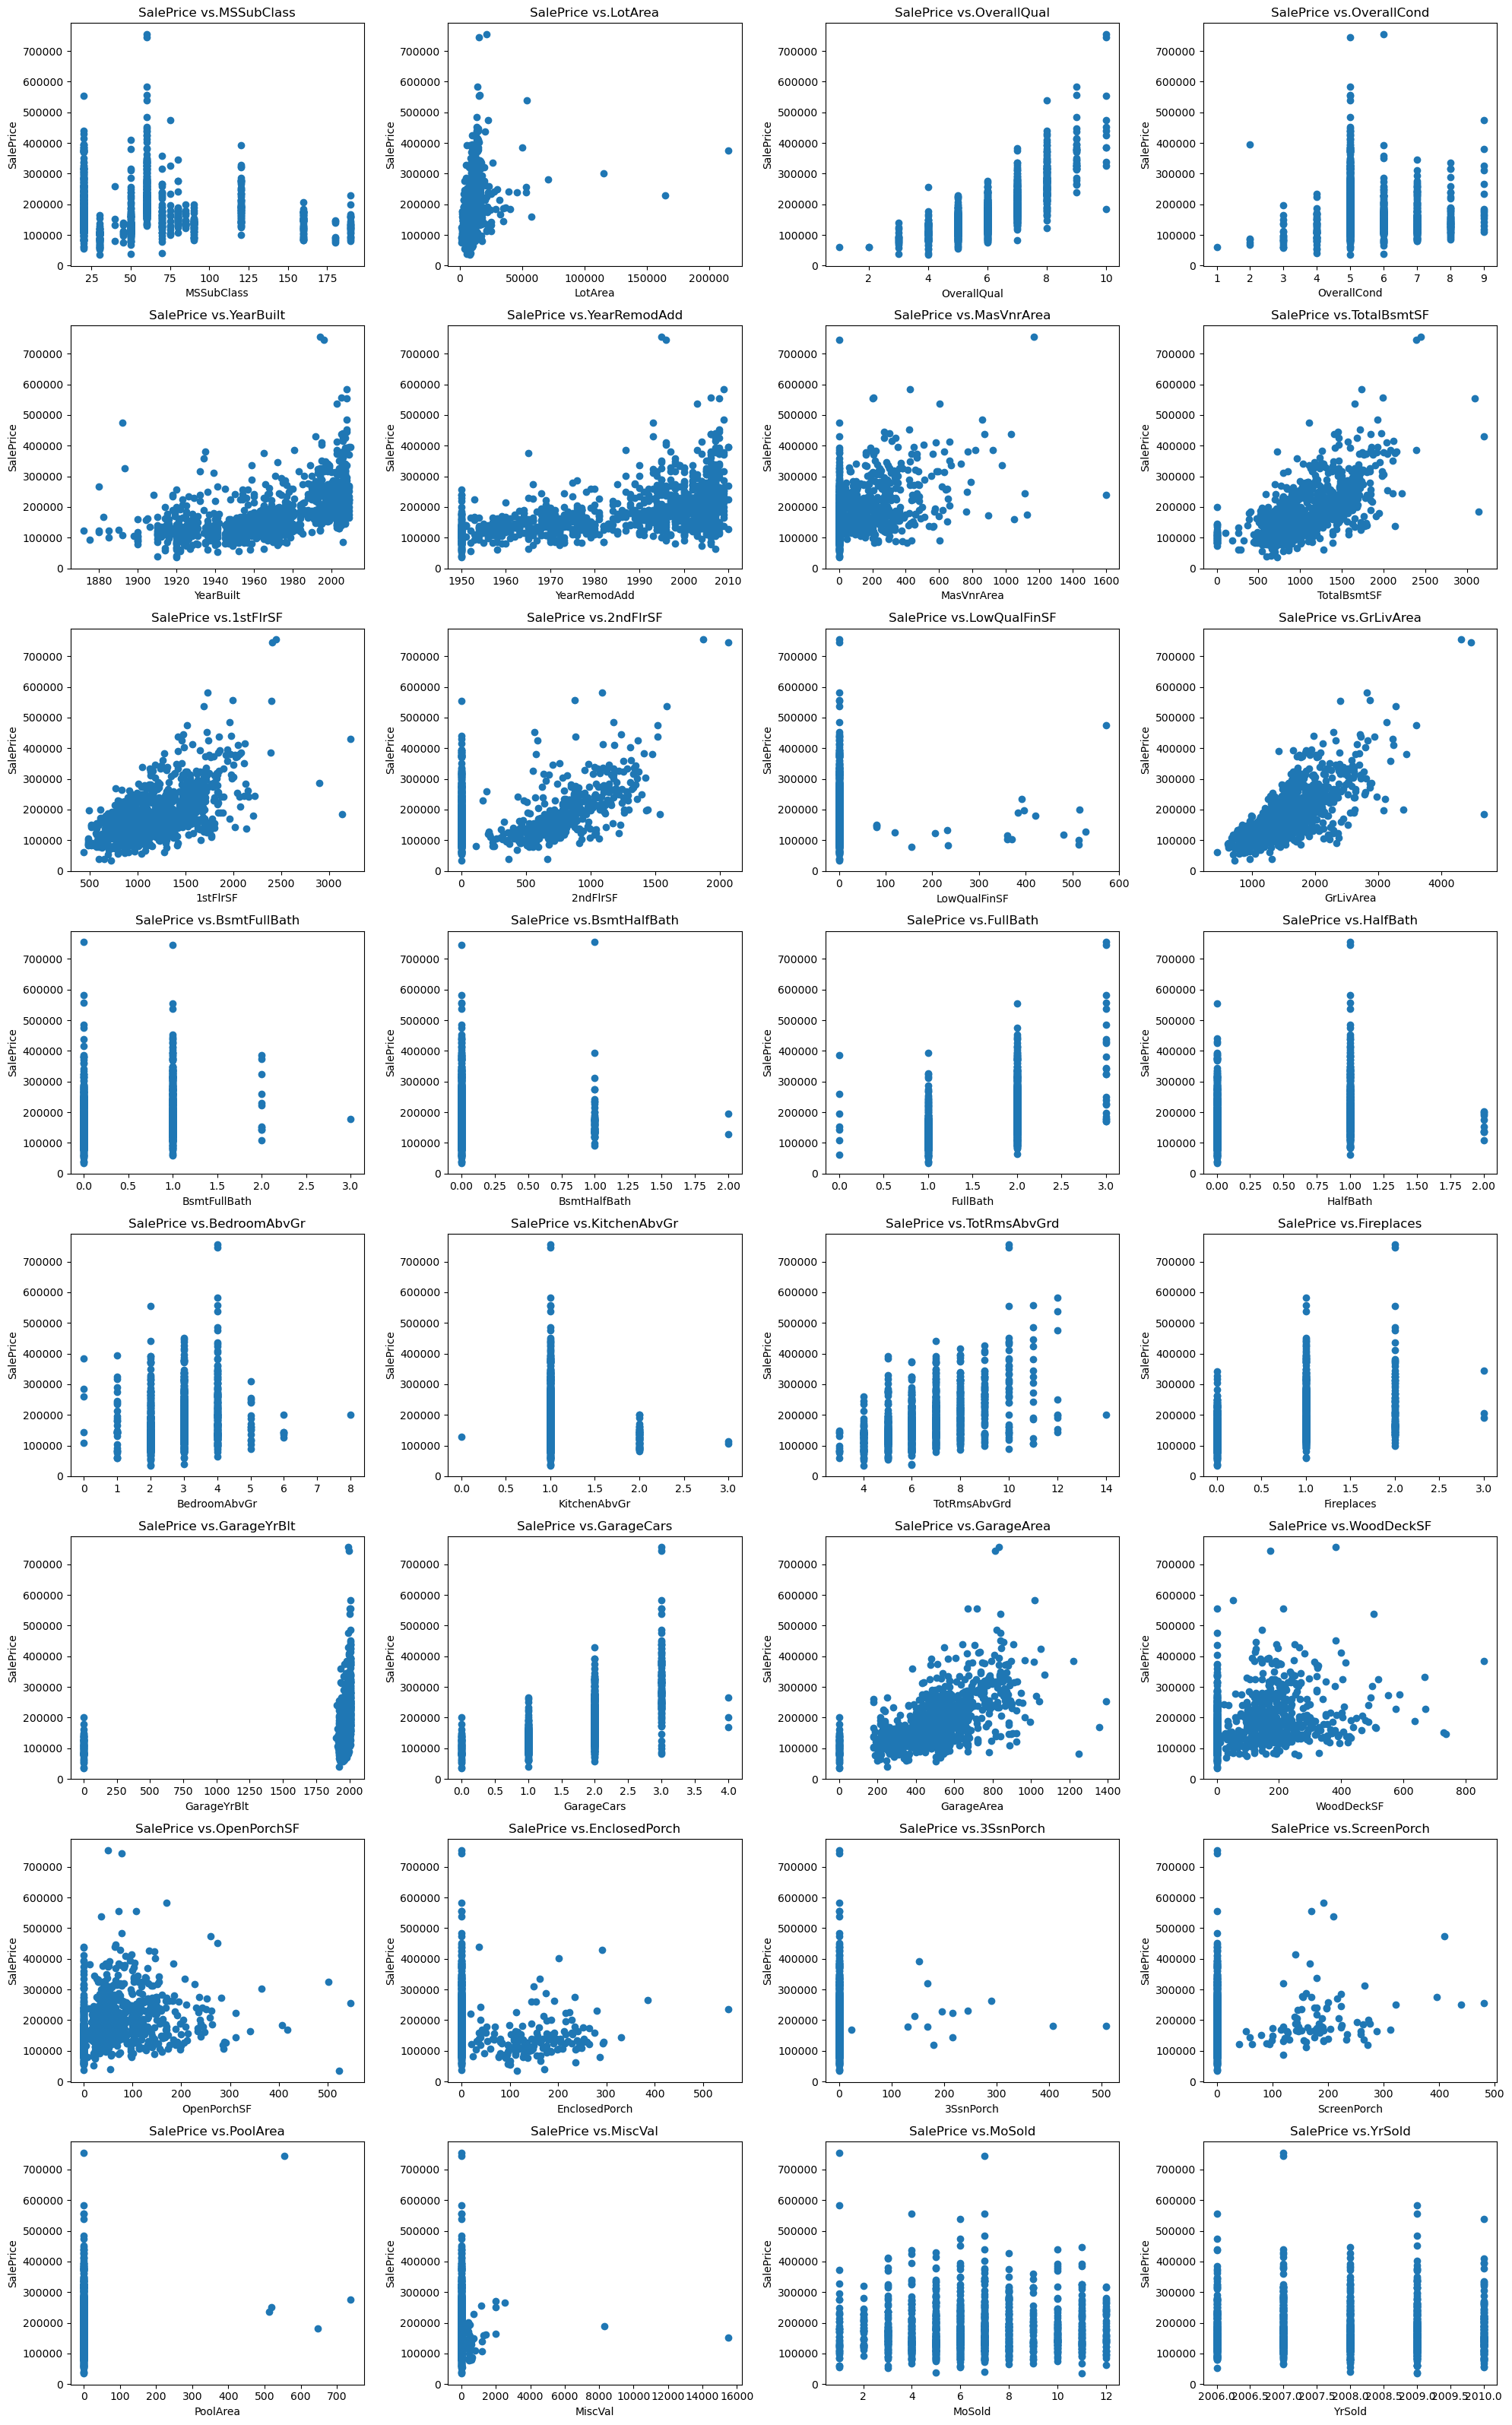

In [103]:
# CORRELACIÓN DE PEARSON

#####################################
## USAMOS LAS VARIABLES ORIGINALES ##
#####################################

k = 0
corr_var_price = {}
plt.figure(figsize=(5*4, 4*8))

# features son las características numéricas
for caract_num in features:
    k += 1
    # Cálculo de correlación
    corr_with_price = y_train_og.corr(X_train_og[caract_num])
    corr_var_price[caract_num] = corr_with_price
    
    # Visualización
    plt.subplot(8, 4, k)
    plt.scatter(X_train_og[caract_num],y_train_og)
    plt.xlabel(str(caract_num))
    plt.ylabel('SalePrice')
    plt.title('SalePrice vs.'+str(caract_num))

plt.tight_layout()
plt.show()

#print(corr_var_price) # esto es un diccionario con cada una de las variables y su correlación con la etiqueta

- **Característica categórica vs. etiqueta numérica**
    
    **Box-plot** entre las características categóricas y las numéricas

In [59]:
len(caract_categoricas_ordinales)

Las no numericas son:Index([], dtype='object')


""
1262
625
37
1160
121


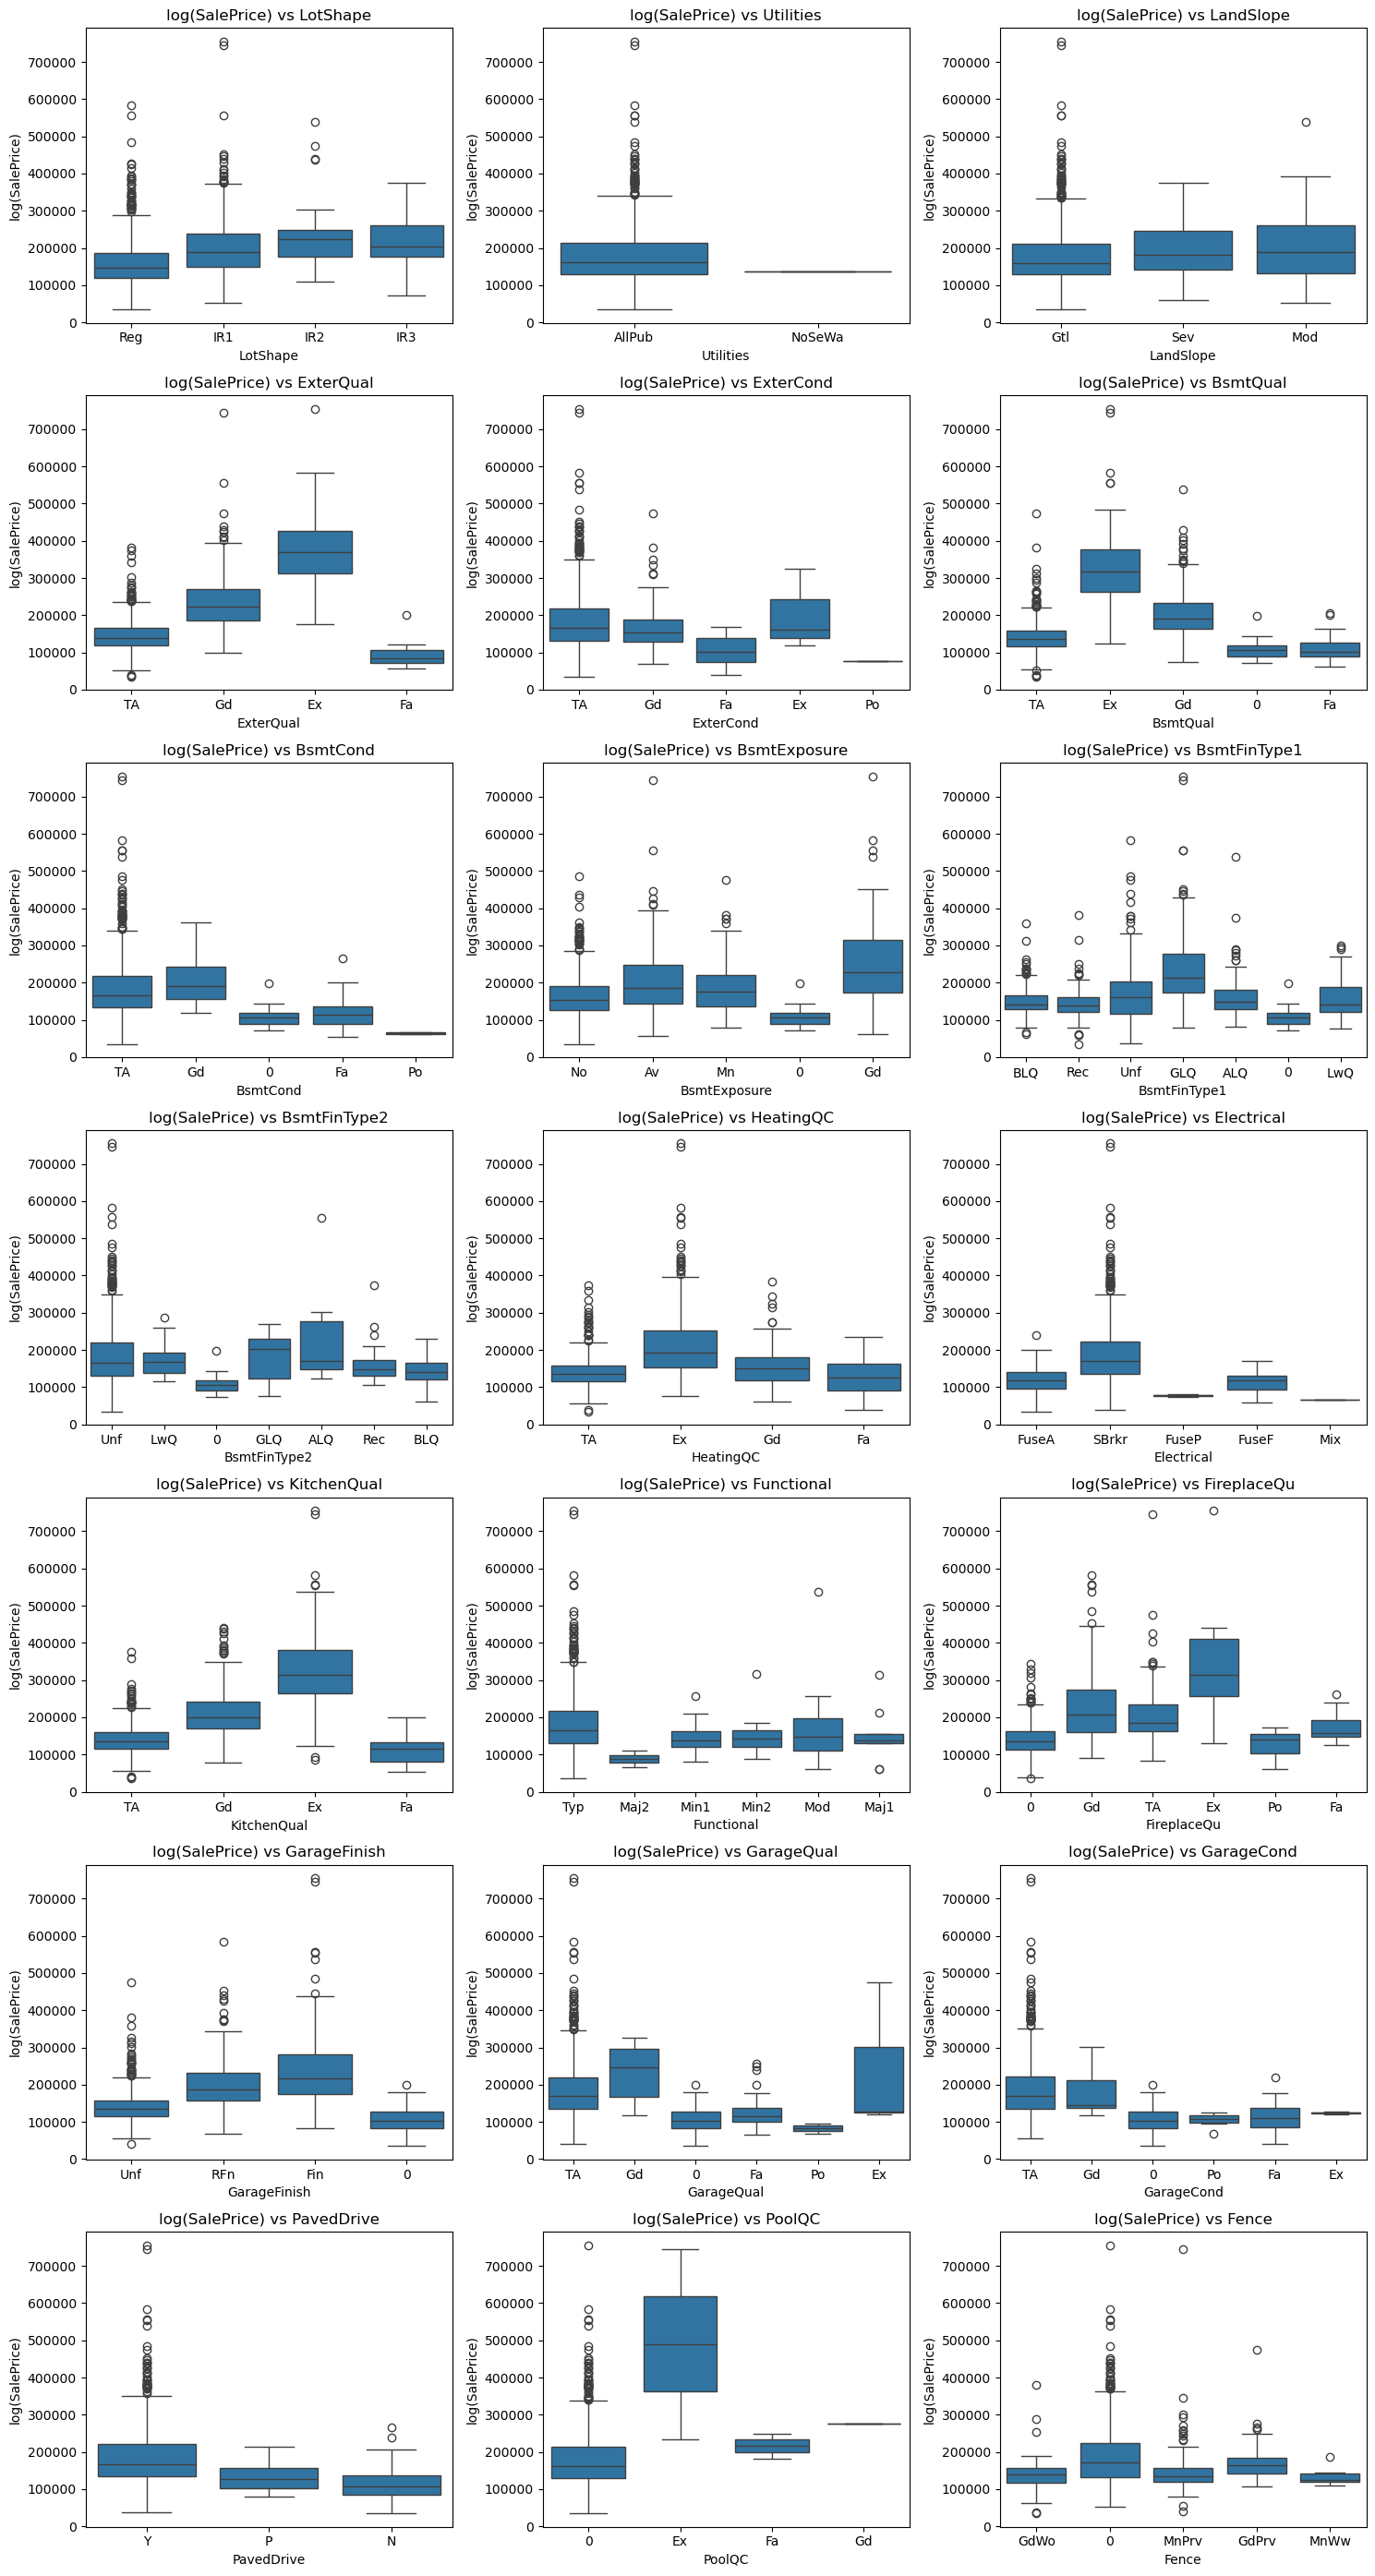

In [ ]:
df_train_plot = pd.concat([y_train_og, X_train_og], axis=1)

plt.figure(figsize=(5*3, 4*7))
k=0

for caract_cat in caract_categoricas_ordinales:
    k += 1
    plt.subplot(7, 3, k)
    sns.boxplot(x=str(caract_cat), y='SalePrice', data=df_train_plot)
    plt.title('log(SalePrice) vs '+str(caract_cat))
    plt.xlabel(str(caract_cat))
    plt.ylabel('log(SalePrice)')

plt.tight_layout()
plt.show()


## 8. Segunda prueba

#### Versión 2 (ANDRES)
Se procederá a realizar un modelo usando como datos las variables numéricos para ver el comportamiento inicial del modelo. Los modelos a entrenar son los siguientes:
- Regresión lineal 
- Random forest


## 4. Outliers


Se crea un boxplots de solo las variables numericas para identificar posibles outlayers
Valores como 
BsmtFinSF1+BsmtFinSF2+BsmtUnfSF = TotalBsmtSF (Por lo que se mantiene Total y se eliminan para disminuir complejidad)


(1451, 32)


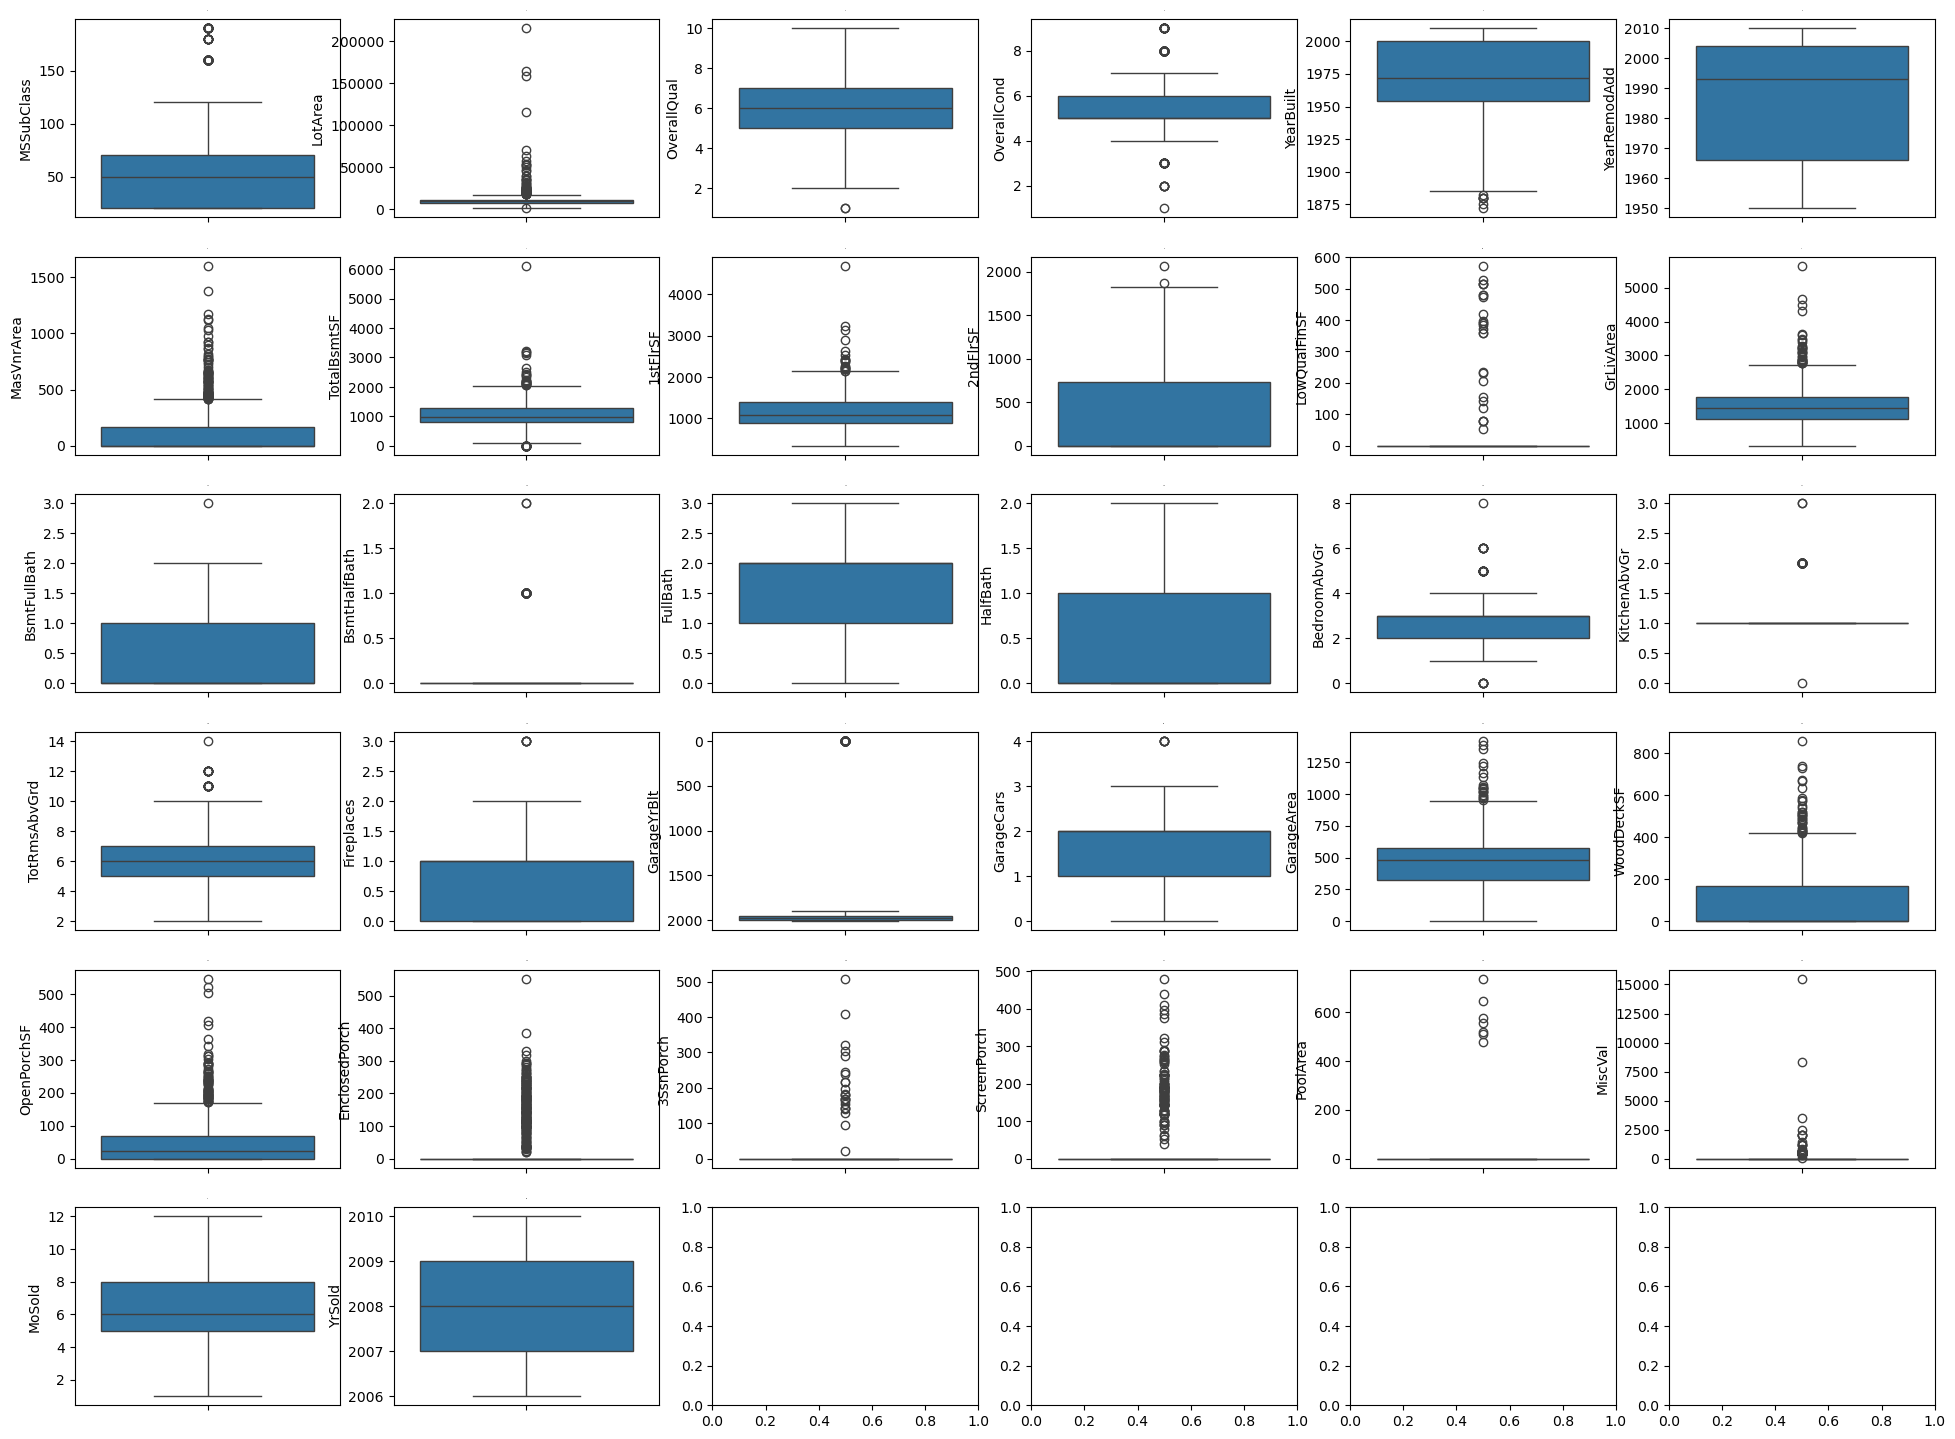

In [123]:
house_features = [
    "MSSubClass",     # Tipo de construcción de la propiedad
    "LotFrontage",    # Metros lineales de frente del terreno
    "LotArea",        # Superficie total del terreno (pies cuadrados) 
    "OverallQual",    # Calidad general de la propiedad (escala 1-10)
    "OverallCond",    # Condición general de la propiedad (escala 1-10)
    "YearBuilt",      # Año de construcción
    "YearRemodAdd",   # Año de remodelación o adición
    "MasVnrArea",     # Área de revestimiento de mampostería (piedra/brick)
    "TotalBsmtSF",    # Superficie total del sótano
    "1stFlrSF",       # Superficie del primer piso
    "2ndFlrSF",       # Superficie del segundo piso
    "LowQualFinSF",   # Superficie de acabado de baja calidad
    "GrLivArea",      # Área habitable por encima del nivel del suelo
    "BsmtFullBath",   # Número de baños completos en el sótano
    "BsmtHalfBath",   # Número de medios baños en el sótano
    "FullBath",       # Número de baños completos arriba del nivel del suelo
    "HalfBath",       # Número de medios baños arriba del nivel del suelo
    "BedroomAbvGr",   # Número de dormitorios sobre el nivel del suelo
    "KitchenAbvGr",   # Número de cocinas sobre el nivel del suelo
    "TotRmsAbvGrd",   # Número total de habitaciones sobre el nivel del suelo (sin contar baños)
    "Fireplaces",     # Número de chimeneas
    "GarageYrBlt",    # Año de construcción del garaje
    "GarageCars",     # Capacidad de autos del garaje
    "GarageArea",     # Área del garaje
    "WoodDeckSF",     # Área del deck de madera
    "OpenPorchSF",    # Área del porch abierto
    "EnclosedPorch",  # Área del porch cerrado
    "3SsnPorch",      # Área del porch de 3 estaciones
    "ScreenPorch",    # Área del porch con malla
    "PoolArea",       # Área de la piscina
    "MiscVal",        # Valor de otras mejoras
    "MoSold",         # Mes de venta
    "YrSold"          # Año de venta
]


print(numerical_values.shape)

# Aplanar axes para iterar fácilmente
# Número de filas y columnas del grid
n_cols = 6
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()  # Convertir a 1D para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot por cada columna
for i, col in enumerate(numerical_values.columns):
    sns.boxplot(y=numerical_values[col], ax=axes[i])
    axes[i].set_title(i, fontsize=0.1)

plt.show()

La verdad iba a eliminar varias variables o outlayesrs pero viendo por encima solo quitaria la de Porch Malla porque las otras si puede que afecten el resultado, asi que por eso he decidido dejarlas.

Ahora un review de correlación para ver si hay datos redundantes


Principalmente en contrarios es el estado actual vs el año de remodelacion lo cual tiene logica y el de la cantidad de garajes y area de madera lo cual esta relacionado pero no je que tanto tiene que ver

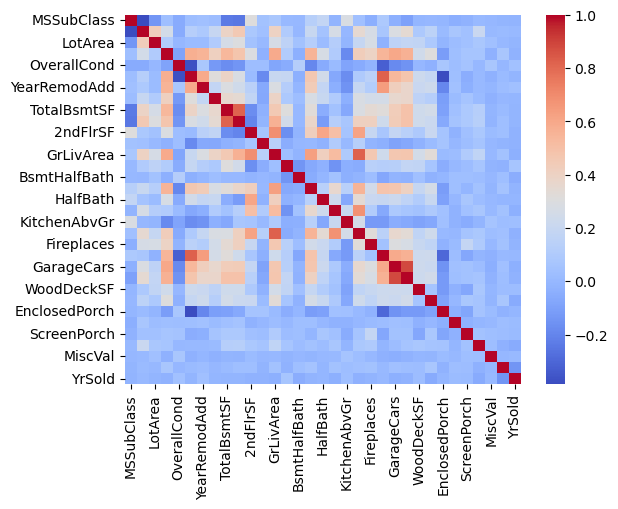

In [ ]:
Q: sns.heatmap(numerical_values.corr(),cmap='coolwarm')
plt.show()

Se realiza una prueba para ver si hay datos no binarios o numeros

In [ ]:
#Comprobar si no hay datos diferentes en el dataset # Obtener las columnas que NO son numéricas ni booleanas
no_numericas = X_train.columns[
    ~X_train.dtypes.apply(lambda x: np.issubdtype(x, np.number) or np.issubdtype(x, np.bool_))
]
print(f'Las no numericas son:{no_numericas}')

# Mostrar sus primeras filas
X_train[no_numericas].head()

## 9. Segunda prueba

### 9.1 Regresión lineal

Tamaño de predict en train: 1160
El RMSE es: 0.09825306771153719
Las variables de mayor a menor son: ['Condition2_PosN', 'MiscFeature_Gar2', 'Condition2_PosA', 'MSZoning_C (all)', 'Exterior1st_BrkComm', 'MiscFeature_Othr', 'Condition2_Feedr', 'RoofStyle_Shed', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'LotConfig_FR3', 'Heating_Floor', 'Utilities', 'RoofMatl_WdShngl', 'Neighborhood_Crawfor', 'Condition2_RRNn', 'GarageType_0', 'SaleType_Oth', 'Heating_GasW', 'RoofMatl_Membran', 'Neighborhood_NridgHt', 'SaleType_ConLI', 'SaleCondition_AdjLand', 'MSZoning_FV', 'SaleCondition_Partial', 'RoofMatl_Tar&Grv', 'RoofStyle_Gambrel', 'Heating_Grav', 'Exterior1st_BrkFace', 'RoofMatl_WdShake', 'BldgType_2fmCon', 'MiscFeature_0', 'Exterior2nd_Stucco', 'SaleType_WD', 'Neighborhood_Edwards', 'Exterior2nd_VinylSd', 'OverallQual', 'Exterior1st_Stucco', 'MSZoning_RL', 'Condition2_Norm', 'Condition2_RRAe', 'Condition1_RRAe', 'Heating_Wall', 'MSZoning_RH', 'SaleType_New', 'Neighborhood_Blueste', 'Found

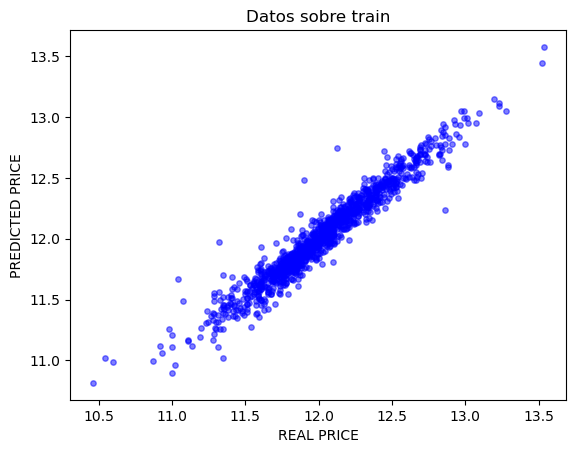

Tamaño de predict en train: 291
El RMSE es: 0.17211322411239663


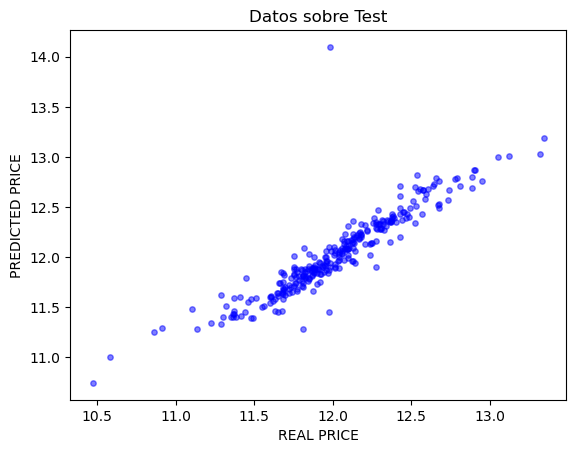

In [ ]:
# Regresion lineal con variables numéricas:

lr = LinearRegression()

lr.fit(X_train, y_train)
predY = lr.predict(X_train)

print(f'Tamaño de predict en train: {predY.size}')

a= metrics.mean_squared_error(y_train, predY)
print(f'El RMSE es: {np.sqrt(a)}')


# Mostrar features ordenadas

features_nombrecillos = X_train.columns.tolist()

coef_dict = dict(zip(features_nombrecillos, lr.coef_.ravel()))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
print(f'Las variables de mayor a menor son: {sorted_keys}')



# Q: Display real Y vs predicted Y.

plt.scatter(y_train,predY,c = 'blue', s=15, alpha=0.5)
plt.title('Datos sobre train')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

#__________________________


#Ahora se calcula en test 

predY_val = lr.predict(X_val)
print(f'Tamaño de predict en train: {predY_val.size}')

a_val= metrics.mean_squared_error(y_val, predY_val)
print(f'El RMSE es: {np.sqrt(a_val)}')


# Q: Display real Y vs predicted Y.

plt.scatter(y_val,predY_val,c = 'blue', s=15, alpha=0.5)
plt.title('Datos sobre Test')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()



Breve descripción de las primeras 10 variables con más peso: 

1. Condition2_PosN

Qué es: Segunda condición de proximidad de la propiedad.

Significado: Cerca de un elemento positivo fuera del sitio, como parque o zona verde.

2. MiscFeature_Gar2

Qué es: Característica adicional de la propiedad.

Significado: Existe un segundo garaje (no incluido en la sección principal del garage).

3. Condition2_PosA

Qué es: Segunda condición de proximidad de la propiedad.

Significado: Adyacente a un elemento positivo fuera del sitio, por ejemplo, espacio recreativo.

4. MSZoning_C (all)

Qué es: Clasificación de zonificación general de la propiedad.

Significado: Zonas comerciales.

5. Exterior1st_BrkComm

Qué es: Material exterior principal de la casa.

Significado: Construcción con ladrillo común en la fachada principal.

6. MiscFeature_Othr

Qué es: Características misceláneas de la propiedad.

Significado: Incluye otras características que no están cubiertas en otras categorías.

7. Condition2_Feedr

Qué es: Segunda condición de proximidad de la propiedad.

Significado: Cerca de una calle alimentadora (feeder street).

8. RoofStyle_Shed

Qué es: Estilo de techo de la propiedad.

Significado: Techo tipo shed, con una sola pendiente.

9. Neighborhood_MeadowV

Qué es: Ubicación física dentro de la ciudad de Ames.

Significado: Propiedad ubicada en el vecindario Meadow Village.

10. Neighborhood_StoneBr

Qué es: Ubicación física dentro de la ciudad de Ames.

Significado: Propiedad ubicada en el vecindario Stone Brook.

### 9.2 Decision Tree

In [149]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
#depth_grid = [10]
#min_samples_leaf_grid = [10]
#max_leaf_nodes_grid = [15]
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

gridCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, n_jobs = -1) # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))



# Q: Instantiate a Decision Tree Classifier with the best parameters from above. 

DTC_best = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, y_train)
Y_pred = DTC_best.predict(X_val)
print( "Tree RMSE : " + str(np.round(np.sqrt(mean_squared_error(y_val,Y_pred)),8)))

# Q: What would be the ACC for a DT with the default parameters? What is the improvement we get with a grid search of the best hyperparams? 

DTC_default = DecisionTreeRegressor()
DTC_default.fit(X_train, y_train)
Y_pred = DTC_default.predict(X_val)
print( "Tree RMSE : " + str(np.round(np.sqrt(mean_squared_error(y_val,Y_pred)),8)))


c:\Users\josec\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Tree best depth : 12
Tree best min_samples_leaf : 23
Tree best max_leaf_nodes : 20
Tree RMSE : 0.19143489
Tree RMSE : 0.20272164
